In [8]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin




In [9]:
# Read data 

df = pd.read_csv('data.csv')

/var/folders/l9/lgcrjc856bb1g071byrjw6rr0000gn/T/ipykernel_52092/847141996.py:3: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [10]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Data discovery

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [12]:
# Check the null value in each attributes

df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

# Data pre-processing

In [13]:
# total_rev_hi_lim 

# Fill missing values in total_rev_hi_lim with Simple Imputer

imputer = SimpleImputer(strategy='median')
total_rev_hi_lim = df['total_rev_hi_lim'].values.reshape(-1,1)
total_rev_hi_lim_imputed = imputer.fit_transform(total_rev_hi_lim)
df['total_rev_hi_lim'] = total_rev_hi_lim_imputed

In [14]:
# home_ownership 

# Remove rows with value ANY

df = df[df['home_ownership'] != 'ANY']
df['home_ownership'].unique()

# Level encoding for home ownership 

home_type = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(home_type)

# Encode the 'grade' column in the DataFrame
df['home_ownership'] = encoder.transform(df['home_ownership'])


In [15]:
# Purpose 

# Label encoding for purpose

df['purpose'].unique()

purposes = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(purposes)
# Encode the 'grade' column in the DataFrame
df['purpose'] = encoder.transform(df['purpose'])


In [16]:
# sub_grade

# Sort the order of subgrades and do label encoding

subgrades = ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5']

def custom_sort_key(subgrade):
    match = re.match(r'([A-Za-z]+)(\d+)', subgrade)
    letter = match.group(1)
    number = int(match.group(2))
    
    return letter, number

sorted_subgrades = sorted(subgrades, key=custom_sort_key)

# Level encoding for sorted sub-grade 

encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(sorted_subgrades)

# Encode the 'grade' column in the DataFrame
df['sub_grade'] = encoder.transform(df['sub_grade'])

In [17]:
# employment_lengths

employment_lengths = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'nan']

label_encoder = LabelEncoder()

# Fit the LabelEncoder with unique values
label_encoder.fit(employment_lengths)

# Encode the attribute values
df['emp_length'] = label_encoder.transform(df['emp_length'])

In [18]:
# mths_since_last_delinq

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

In [19]:
# mths_since_last_record

df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

In [20]:
# revol_util
# Handle missing value with imputer

imputer = SimpleImputer(strategy='mean')

revol_util = df['revol_util'].values.reshape(-1,1)

revol_util_imputed = imputer.fit_transform(revol_util)

df['revol_util'] = revol_util_imputed

In [21]:
# aggregate annual_inc and annual_inc_joint

df.loc[df['application_type'] == 'JOINT', 'annual_inc'] = df.loc[df['application_type'] == 'JOINT', 'annual_inc_joint']
df = df.drop('annual_inc_joint', axis=1)

In [22]:
# dti_joint

df.loc[df['application_type'] == 'JOINT', 'dti'] = df.loc[df['application_type'] == 'JOINT', 'dti_joint']
df = df.drop('dti_joint', axis=1)

In [23]:
# verification_status_joint

df.loc[df['application_type'] == 'JOINT', 'verification_status'] = df.loc[df['application_type'] == 'JOINT', 'verification_status_joint']
df = df.drop('verification_status_joint', axis=1)

In [24]:
# term 
# Label encoding for term

term = [' 36 months', ' 60 months']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(term)

# Encode the 'grade' column in the DataFrame
df['term'] = encoder.transform(df['term'])

In [25]:
# verification_status

veri = ['Not Verified', 'Source Verified', 'Verified']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(veri)


df['verification_status'] = encoder.transform(df['verification_status'])

In [26]:
# pymnt_plan

plan = ['n', 'y']  # Unique values for encoding

encoder = LabelEncoder()
encoder.fit(plan)
df['pymnt_plan'] = encoder.transform(df['pymnt_plan'])

In [27]:
# application_type

type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df['application_type'] = encoder.transform(df['application_type'])

In [28]:

# initial_list_status

status = ['f', 'w'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(status)

df['initial_list_status'] = encoder.transform(df['initial_list_status'])

In [29]:
# Drop not usable attributes 

remove_col = [
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'desc',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'tot_coll_amt',
    'tot_cur_bal', 
    'open_acc_6m',
    'open_il_6m', 
    'open_il_12m', 
    'open_il_24m', 
    'mths_since_rcnt_il', 
    'total_bal_il', 
    'il_util', 
    'open_rv_12m' ,
    'open_rv_24m', 
    'max_bal_bc', 
    'all_util', 
    'inq_fi', 
    'total_cu_tl', 
    'inq_last_12m',
    'grade'
]

df = df.drop(remove_col, axis=1)

In [30]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,application_type,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000,5000,4975.0,0,10.65,162.87,6,1,4,24000.0,...,5831.78,5000.00,861.07,0.00,0.00,0.00,0,0,23800.0,0
1,2500,2500,2500.0,1,15.27,59.83,13,10,4,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,0,0,23800.0,1
2,2400,2400,2400.0,0,15.96,84.33,14,1,4,12252.0,...,3003.65,2400.00,603.65,0.00,0.00,0.00,0,0,23800.0,0
3,10000,10000,10000.0,0,13.49,339.31,10,1,4,49200.0,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,0,0,23800.0,0
4,3000,3000,3000.0,1,12.69,67.79,9,0,4,80000.0,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,0,0,23800.0,0


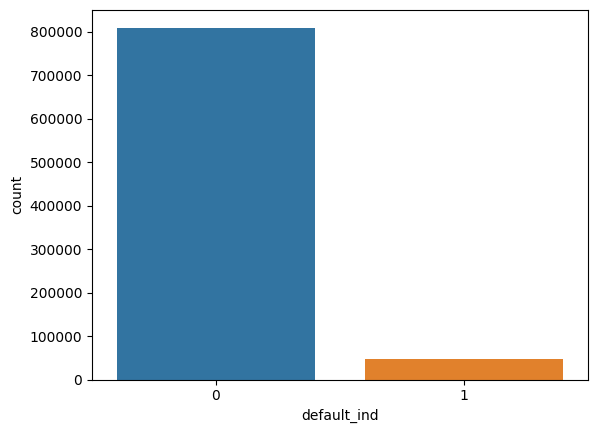

In [31]:
# Visualize default_ind attribute

sns.countplot(data=df, x='default_ind')
plt.show()

## New feature using user defined transformer

In [32]:
class CreditUtilizationRatioTransformer(BaseEstimator, TransformerMixin):

    # Constructor 
    def __init__(self, revol_bal_col='revol_bal', total_rev_hi_lim_col='total_rev_hi_lim', include_credit_utilization=True):
        self.revol_bal_col = revol_bal_col
        self.total_rev_hi_lim_col = total_rev_hi_lim_col
        self.include_credit_utilization = include_credit_utilization

    # Fit not required -> return self 
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Return the index of the column in the data set
        revol_bal_ix = np.where(X.columns == self.revol_bal_col)[0][0]
        total_rev_hi_lim_ix = np.where(X.columns == self.total_rev_hi_lim_col)[0][0]

        # Calculate the Credit Utilization Ratio.
        credit_utilization_ratio = X.iloc[:, revol_bal_ix] / X.iloc[:, total_rev_hi_lim_ix]

        if self.include_credit_utilization:
            transformed_X = np.column_stack((X, credit_utilization_ratio))
        else:
            transformed_X = X.values if isinstance(X, pd.DataFrame) else X

        return transformed_X


In [34]:
# Specify the column names for 'revol_bal' and 'total_rev_hi_lim'.
revol_bal_col_name = 'revol_bal'
total_rev_hi_lim_col_name = 'total_rev_hi_lim'

'''
# Create an instance of the transformer without including the 'Credit Utilization Ratio' feature:
transformer_no_credit = CreditUtilizationRatioTransformer(revol_bal_col=revol_bal_col_name,
                                                          total_rev_hi_lim_col=total_rev_hi_lim_col_name,
                                                          include_credit_utilization=False)

# Apply the transformer without the 'Credit Utilization Ratio' feature:
transformed_data_no_credit = transformer_no_credit.transform(df)

'''

# Now, create an instance of the transformer with the 'Credit Utilization Ratio' feature:
transformer_with_credit = CreditUtilizationRatioTransformer(revol_bal_col=revol_bal_col_name,
                                                            total_rev_hi_lim_col=total_rev_hi_lim_col_name,
                                                            include_credit_utilization=True)

# Apply the transformer with the 'Credit Utilization Ratio' feature:
transformed_data_with_credit = transformer_with_credit.transform(df)


In [38]:
transformed_data_with_credit

array([[5.00000000e+03, 5.00000000e+03, 4.97500000e+03, ...,
        2.38000000e+04, 0.00000000e+00, 5.73445378e-01],
       [2.50000000e+03, 2.50000000e+03, 2.50000000e+03, ...,
        2.38000000e+04, 1.00000000e+00, 7.08823529e-02],
       [2.40000000e+03, 2.40000000e+03, 2.40000000e+03, ...,
        2.38000000e+04, 0.00000000e+00, 1.24201681e-01],
       ...,
       [1.30000000e+04, 1.30000000e+04, 1.30000000e+04, ...,
        1.80000000e+04, 0.00000000e+00, 6.12833333e-01],
       [1.20000000e+04, 1.20000000e+04, 1.20000000e+04, ...,
        2.70000000e+04, 0.00000000e+00, 3.05703704e-01],
       [2.00000000e+04, 2.00000000e+04, 2.00000000e+04, ...,
        4.17000000e+04, 0.00000000e+00, 7.97745803e-01]])

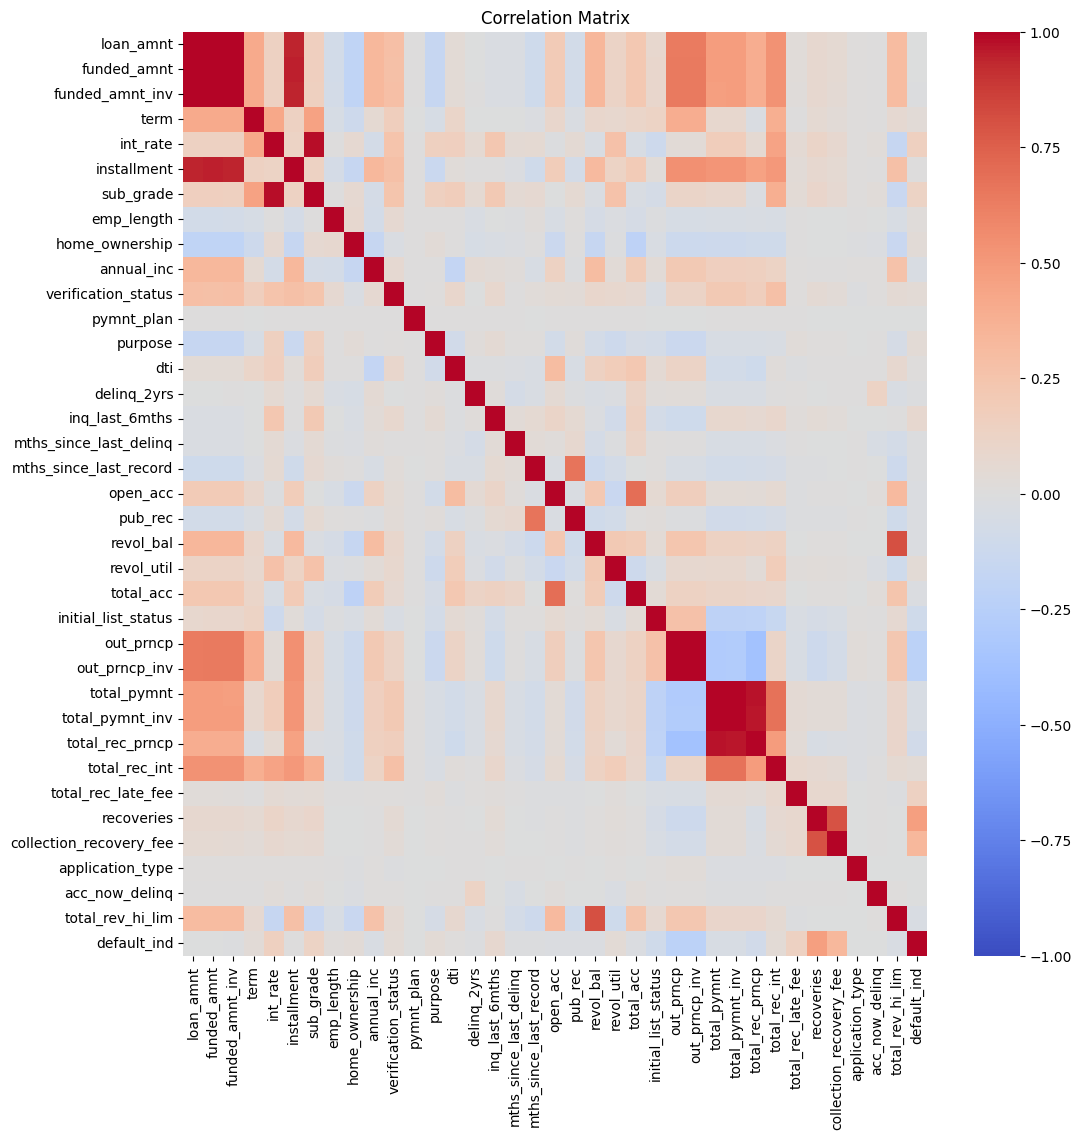

In [33]:
# Visualize - Correlation matrix

# Create a correlation matrix
corr_matrix = df.corr()

# Select the correlation values with 'default_ind'
target_corr = corr_matrix['default_ind']

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show() 

# Model selection and training

Everyone create your own branch, note book and copy the pre processing part, train your own model. Combine together in this file at the end

# Fine tune the model

# Eveluate the outcome